# Camera Calibration - Part2
<hr style="border:3px solid red"> </hr>

### Camera Calibration - Direct Linear Transform
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this post we'll discuss about how to obtain intrinsic and extrinsic parameters of a camera, using a technique **Direct Linear Tranform**. So what we are going to do is to estimate 5 intrinsic parameters and 6 extrinsic parameters under assumption that we know certain number of image points and corresponding world points in environment. If you dont know about what are these parameters you can explore about [Camera Calibration - Part1](https://prithviramg.github.io/posts/Camera%20Calibration%20-%20Part1.html). So to Estimate extrinsics and intrinsics, we are given with 3D Co-ordinates of object points and 2D location of corresponding 3D points on the image.
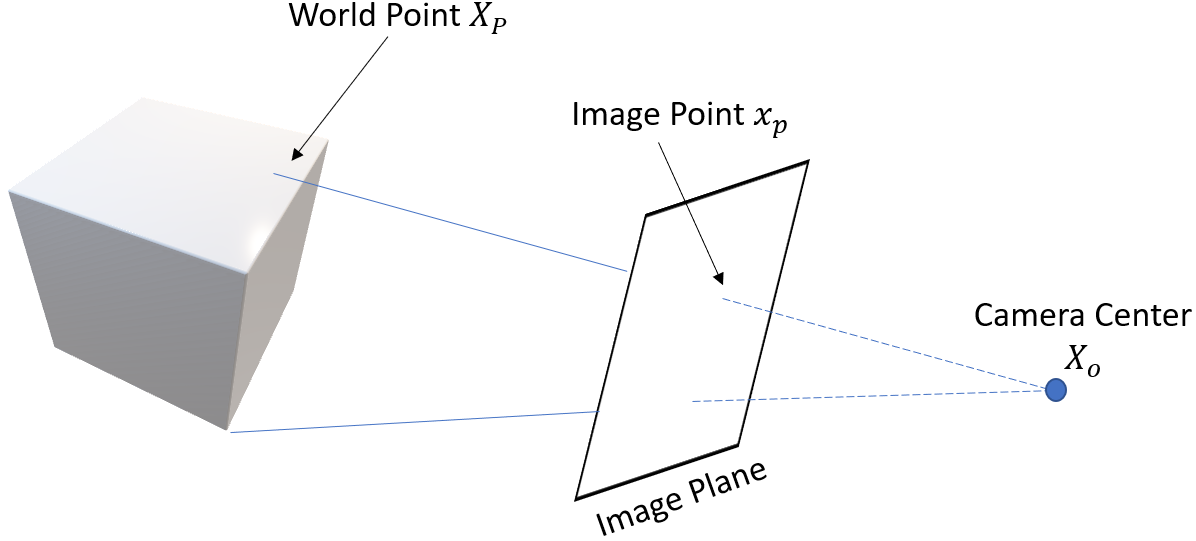. 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Mapping works using the DLT (Direct Linear Transform), to describe the above image we have a camera center $X_o$ and there is an image plane and points on the image $x_p = (x,y)$ and the 3D world point of the object $X_P = (X,Y,Z)$. This is the model we are using but in reality the image plane sits behind the camera center, so for our calculation purpose we'll use $180^0$ rotated of the image plane. 
<br><br>
The **Direct Linear Transform** maps the world location points to image location by the given below equation.
$$\begin{align*}(x_p)_{3 \times 1} &= \underbrace{K_{3 \times 3}}_\text{Intrisic Parameters} \quad \underbrace{\underbrace{R_{3 \times 3}}_\text{Rotation}[(I_3)_{3 \times 3} |\quad\underbrace{-(X_O)_{3 \times 1}}_\text{Translation}]}_{\text{Extrinsic Parameters}({3 \times 4})}(X_P)_{4 \times 1}\\
&=\underbrace{P_{3 \times 4}}_\text{Calibration Matrix}(X_P)_{4 \times 1}
\end{align*}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; So to find the **Calibration Matrix**, how many 3D to 2D point correspondences are needed. To know this first write the equation of the transformation in homogeneous form:
$$\begin{align*}
\begin{pmatrix} u\\v\\w \end{pmatrix}_{3 \times 1} &= P_{3 \times 4}\begin{pmatrix} U\\V\\W\\T \end{pmatrix}_{4 \times 1}\text{, Homogeneous form}\\
\begin{pmatrix} x = \frac{u}{w}\\y = \frac{u}{w}\\1 \end{pmatrix}_{3 \times 1} &= P_{3 \times 4}\begin{pmatrix} X = \frac{U}{T}\\Y = \frac{V}{T}\\Z = \frac{W}{T}\\1 \end{pmatrix}_{4 \times 1}\text{, Euclidean form}\\
x &= \frac{p_{11}X + p_{12}Y + p_{13}Z + p_{14}}{p_{31}X + p_{32}Y + p_{33}Z + p_{34}}\\
y &= \frac{p_{21}X + p_{22}Y + p_{23}Z + p_{24}}{p_{31}X + p_{32}Y + p_{33}Z + p_{34}}
\end{align*}$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; we know that calibration matrix has 11 degrees of freedom, and for each observation we are getting 2 equations, so we need atleast 6 3D to 2D point correspondences in order to estimate the **Calibration Matrix**. Under assumption that our camera is an affine camera. That means we are neglecting the non-linear errors such as barrel distortions.

#### DLT: Problem Specification
- Task: Estimate the 11 elements of P
- Given:
    - 3D Coordinates $X_i$ of $i\geq 6$ object points
    - Observed image coordiantes $x_i$ of an uncalibrated camera with the mapping
    $$x_i = PX_i, \quad (i=1,2,\dots,I)$$
    - Data association

So Lets re-arrange the above equation:
$$\begin{align*}
x({p_{31}X + p_{32}Y + p_{33}Z + p_{34}}) &= {p_{11}X + p_{12}Y + p_{13}Z + p_{14}}\\
x({p_{31}X + p_{32}Y + p_{33}Z + p_{34}}) - ({p_{11}X + p_{12}Y + p_{13}Z + p_{14}} )&= 0
\end{align*}$$
<br>
similarly for $y$ coordinate
$$\begin{align*}
y({p_{31}X + p_{32}Y + p_{33}Z + p_{34}}) &= {p_{21}X + p_{22}Y + p_{23}Z + p_{24}}\\
y({p_{31}X + p_{32}Y + p_{33}Z + p_{34}}) - ({p_{21}X + p_{22}Y + p_{23}Z + p_{24}} )&= 0
\end{align*}$$
<br>
lets rewrite the above 2 equations in matrix format:
$$\begin{align*}
\begin{pmatrix}-X&-Y&-Z&-1&0&0&0&0&xX&xY&xZ&x\\
0&0&0&0&-X&-Y&-Z&-1&yX&yY&yZ&y\end{pmatrix}
\begin{pmatrix}p_{11}\\p_{12}\\p_{13}\\p_{14}\\p_{21}\\p_{22}\\p_{23}\\p_{24}\\p_{31}\\p_{32}\\p_{33}\\p_{34}\end{pmatrix} = 0
\end{align*}$$
so if we have $I$ point correspondences then the matrix will look like:
$$\begin{align*}
\begin{pmatrix}
-X_1&-Y_1&-Z_1&-1&0&0&0&0&x_1X_1&x_1Y_1&x_1Z_1&x_1\\
0&0&0&0&-X_1&-Y_1&-Z_1&-1&y_1X_1&y_1Y_1&y_1Z_1&y_1\\
-X_2&-Y_2&-Z_2&-1&0&0&0&0&x_2X_2&x_2Y_2&x_2Z_2&x_2\\
0&0&0&0&-X_2&-Y_2&-Z_2&-1&y_2X_2&y_2Y_2&y_2Z_2&y_2\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\
-X_i&-Y_i&-Z_i&-1&0&0&0&0&x_iX_i&x_iY_i&x_iZ_i&x_i\\
0&0&0&0&-X_i&-Y_i&-Z_i&-1&y_iX_i&y_iY_i&y_iZ_i&y_i\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\
-X_I&-Y_I&-Z_I&-1&0&0&0&0&x_IX_I&x_IY_I&x_IZ_I&x_I\\
0&0&0&0&-X_I&-Y_I&-Z_I&-1&y_IX_I&y_IY_I&y_IZ_I&y_I\\
\end{pmatrix}
\begin{pmatrix}p_{11}\\p_{12}\\p_{13}\\p_{14}\\p_{21}\\p_{22}\\p_{23}\\p_{24}\\p_{31}\\p_{32}\\p_{33}\\p_{34}\end{pmatrix} &= 0
\end{align*}$$
$$\underbrace{A}_{2I\times12}\underbrace{p}_{12\times1}=0$$

#### Solving the Linear system (Homogeneous system => SVD)
- Solving a system of linear equations of the form $Ap = 0$ is equivalent to finding the null space of $A$, So the vector $p$ must be in null space of $A$
- Thus, we can apply the SVD to solve $Ap = 0$. Singular Value decomposition is technique to solve linear equations by finding the singular values and singular vectors and if we have a singular value which is equal to $0$, then that singular vector is part of the null space
- Choose $p$ as the singular vector belonging to the singular value of 0
- In case of redundant observations, we will have contradictions $(Ap \neq 0)$:
$$Ap = w$$
- so then what want to do is find the $p$ which minimizes the $w$:
$$\begin{align*}
\Omega &= w^Tw\\
\hat{p} &= \operatorname*{argmin}_p w^Tw\\
&= \operatorname*{argmin}_p p^TA^TAp\\
\end{align*}$$
$$\text{with }||p||_2 = \sum_{i,j}{p_{ij}^2} = 1$$
    - Since $w$ is some error which is nearest to nullspace
    - So what we'll do is to find the vector $p$ which minimizes the $L_2$ norm of $w$
    - under the assumption that $L_2$ norm of $p$ should be equal to 1, this is used to ensure that $p$ should not be a zero vector
- Singular value Decomposition (SVD)
$$ \underbrace{A}_{2I\times12} = \underbrace{U}_{2I\times12} \overbrace{S}^{12\times12} {\underbrace{V}_{12\times12}}^T = \sum_{i = 1}^{12}s_iu_i{v_i}^T$$
    - The SVD decomposes the matrix in to 3 matrices $U_{2I\times12}$, $S_{12\times12}$, and $V_{12\times12}$
    - The Matrix $S_{12\times12}$ is diagonal matrix, which contains the singular values in descending order, the largest value will be first and least value will be on the last of the diagonal vector
    - The smallest value $v_{12}$ will be our nullspace vector, if it zero then it is perfect, but typically it is not zero(close to zero)
    - The matrix $V_{12\times12}$ stores the singular vector, and we pick the vector which corresponds to the smallest singular value, use this vector as solution to our equation
- choosing $p = v_{12}$ (the singular vector belonging to the smallest singular value $s_{12}$) minimizes $\Omega$
$$p = \begin{pmatrix}p_{11}\\p_{12}\\\vdots\\p_{34}\end{pmatrix} \implies \begin{pmatrix}p_{11}&p_{12}&p_{13}&p_{14}\\p_{21}&p_{22}&p_{23}&p_{24}\\p_{31}&p_{32}&p_{33}&p_{34}\end{pmatrix}$$

##### Critical Surfaces
- So now the point is does this always work?, so it turns out that there are some situations where we wont get nullspace vector
- So the Matrix has 12 column vectors and in that 1 column is belongs to nullspace, so eventually the Matrix $A$ has rank of 11 (number of pivot elements)
- Now consider if we have only 10 3d to 2d correspondences then the rank will not be 11, it might be less than 11. So we need to atleast have 6 points
- We might get rank deficiency if all points lie on single plane in the 3D world. For simplicity lets assume all the points lie on the ground plane, so $Z = 0$, then:
$$\begin{pmatrix}
-X_1&-Y_1&0&-1&0&0&0&0&x_1X_1&x_1Y_1&0&x_1\\
0&0&0&0&-X_1&-Y_1&0&-1&y_1X_1&y_1Y_1&0&y_1\\
-X_2&-Y_2&0&-1&0&0&0&0&x_2X_2&x_2Y_2&0&x_2\\
0&0&0&0&-X_2&-Y_2&0&-1&y_2X_2&y_2Y_2&0&y_2\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\
-X_i&-Y_i&0&-1&0&0&0&0&x_iX_i&x_iY_i&0&x_i\\
0&0&0&0&-X_i&-Y_i&0&-1&y_iX_i&y_iY_i&0&y_i\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\
-X_I&-Y_I&0&-1&0&0&0&0&x_IX_I&x_IY_I&0&x_I\\
0&0&0&0&-X_I&-Y_I&0&-1&y_IX_I&y_IY_I&0&y_I\\
\end{pmatrix}_{\text{rank} = 9\text{, (from 12, when all 3D points lie on a plane)}}$$

#### Decomposing $P$ to intrisic and extrinsic matrices
- If we keenly observe the structure of matrix, then we can see that \
$$\begin{align*}
\underbrace{P}_{calibration} &= \underbrace{K}_{intrinsic}\underbrace{R}_{Rotation}[I_3|\quad \underbrace{-X_O}_{translation}]\\
&= [KR|\quad -KRX_O]\\
&= [\underbrace{H}_{3\times3}|\quad \underbrace{h}_{3\times1}]_{\text{where, }H = KR\text{, and }h=-KRX_O}
\end{align*}$$
- To get the **projection center** it is pretty straight forward
$$X_O = -H^{-1}h$$
- Now the point how is to obtain the $H = KR$. The structure tells us that $K$ is upper triangular matrix and $R$ is orthonormal matrix. So to decompose the $KR$ matrix we can use **QR-Decompostion**.
- But there is small problem in QR-decomposition, that is we dont perform the decomposition directly on $H$, because the $H$ contains triangular matrix and orthonormal matrix in order from left to right. But the QR-decomposition performs orthonormal and triangular from left to right. So instead of decomposing $H$ directly, we can perform decomposing on $(H^{-1})$, which results in $\underbrace{R^{-1}}_{Q}\underbrace{K^{-1}}_{R}$
- And we have to keep note that the $H$ is a homogeneous matrix, and as a result the calibration matrix is a homogeneous matrix. So we need to appropriate normalisation, we can acheive this normalization by dividing the matrix with the last element$$K \leftarrow \frac{1}{k_{33}}K$$
- If we compute the decomposition of $H^{-1}$, it'll lead to $K^{-1}$, which has positive diagonal elements, consider the first 2 elements $K_{11}$, and $K_{22}$, was our camera constants. But we define that camera constants are negative because we considered the image plane is sitting in front of the camera center. To compensate this we need to perform rotation of our coordinate system, we can do this by rotation around z-axis$$R \leftarrow R(z,\pi)R = \begin{pmatrix}-1&0&0\\0&-1&0\\0&0&1\end{pmatrix}$$

#### Salutations
1. Photogrammetric Computer Vision: Statistics, Geometry, Orientation and Reconstruction, by  Wolfgang Förstner , Bernhard P. Wrobel
2. Multiple View Geometry in Computer Vision (Second Edition), by Andrew Zisserman
3. [Cyrill Stachniss](https://www.youtube.com/channel/UCi1TC2fLRvgBQNe-T4dp8Eg)

In [1]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))